In [5]:
def splite_content(role,data):
  return ([message['content'] for item in data for message in item["messages"] if message['role'] == role])

In [6]:
import re
import ast

def convert_to_dict(text):
    match = re.search(r"<tool_call>\n(.*?)\n</tool_call>", text)

    if match:
        tool_dict_str = match.group(1)
        try:
            result = ast.literal_eval(tool_dict_str)
            return(result)
        except Exception as e:
            return({})
    else:
        return({})

In [7]:
# data_test_assistant_contents = splite_content("assistant",test_data)
# data_test_user_contents = splite_content("user",test_data)

In [8]:
import json
import pandas as pd

with open('Data_RandomDate_finetune-Tell.json', 'r', encoding='utf-8') as f:
  test_data = (json.load(f))["test"]

with open("Qwen_3-0.6b-Finetuned-predict-UpdatedData.json", 'r', encoding='utf-8') as f:
  predict_data = json.load(f)

len(test_data), len(predict_data)

(296, 296)

In [9]:
from plotnine import *
theme_set(theme_minimal(11))
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          percentify_numbers = True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """

    if percentify_numbers:
        cm = (100 * cm / cm.sum()).round().astype(int)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Action**

In [11]:
data_test_assistant_contents = splite_content("assistant",test_data)
data_predict_assistant_contents = splite_content("assistant",predict_data)

In [12]:
test_dict = [d for d in map(convert_to_dict, data_test_assistant_contents)]
predict_dict = [d for d in map(convert_to_dict, data_predict_assistant_contents)]

In [13]:
user_contents = splite_content("user",test_data)

In [14]:
user_contents[0]

'เพิ่มแจ้งเตือนนัดถกกันเรื่องโปรเจควันที่ 5 เมษา ตอนบ่ายโมงสิบห้า'

In [15]:
predict_dict[1]

{'name': 'add_event_date',
 'arguments': {'date': '2025-06-09', 'time': '22:00', 'title': 'เทรนงาน'}}

In [16]:
input = np.array([item for item in user_contents])
actuals = np.array([item['name'] for item in test_dict])

predict = []

for item in predict_dict:
  try :
    item['name']
    predict.append(item['name'])
  except:
    predict.append("None")

predict = np.array(predict)

len(predict)

296

In [17]:
df = pd.DataFrame({'input': input, 'actual_action': actuals, 'pred_action': predict})
df

,input,actual_action,pred_action
0,เพิ่มแจ้งเตือนนัดถกกันเรื่องโปรเจควันที่ 5 เมษ...,add_event_date,add_event_date
1,วันที่ 9 มิถุนายน ตอนสี่ทุ่ม มีนัดเทรนงาน ช่วย...,add_event_date,add_event_date
2,ขอดูตารางวันที่ 24 ตุลาคม หน่อย,view_event_date,view_event_date
3,ลบนัดเล่นเกมกับเพื่อนวันที่ 11 ธันวา ออก,delete_event_date,delete_event_date
4,มีนัดอะไรวันที่ 4 กันยายน บ้าง,view_event_date,view_event_date
...,...,...,...
291,วันพฤหัสหน้าตอนตีสามสามสิบ มีนัดคุยไอเดีย ช่วย...,add_event_date,add_event_date
292,วันที่ 23 พฤษภา ตอนตีห้า ผมมีนัดปรึกษาโปรเจกต์...,add_event_date,add_event_date
293,เปลี่ยนเวลานัดออกกำลังกายของวันที่ 4 ธันวา ไปเ...,update_event,update_event
294,เปลี่ยนเวลานัดตรวจงาน วันที่ 29 ธันวา เป็นเก้า...,update_event,update_event


In [18]:
df.actual_action,df.pred_action

(0         add_event_date
 1         add_event_date
 2        view_event_date
 3      delete_event_date
 4        view_event_date
              ...        
 291       add_event_date
 292       add_event_date
 293         update_event
 294         update_event
 295    delete_event_date
 Name: actual_action, Length: 296, dtype: object,
 0         add_event_date
 1         add_event_date
 2        view_event_date
 3      delete_event_date
 4        view_event_date
              ...        
 291       add_event_date
 292       add_event_date
 293         update_event
 294         update_event
 295    delete_event_date
 Name: pred_action, Length: 296, dtype: object)

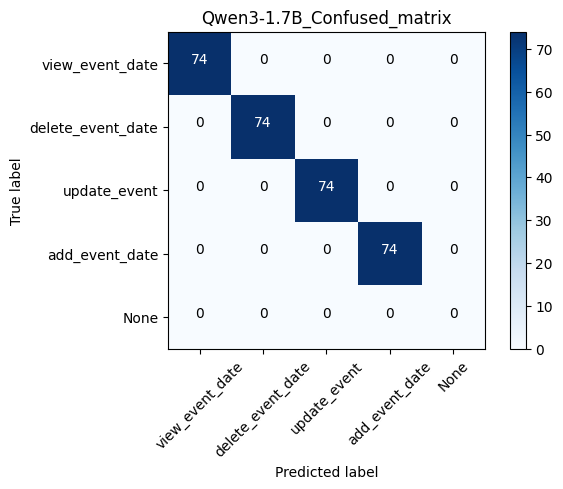

In [19]:
action = ['view_event_date', 'delete_event_date', 'update_event','add_event_date',"None"]

cm = confusion_matrix(y_true=df.actual_action, y_pred=df.pred_action,labels=action)
plot_confusion_matrix(cm,
                      classes=action,
                      percentify_numbers = False,
                      title="Qwen3-1.7B_Confused_matrix")

In [20]:
accuracy = (df['actual_action'] == df['pred_action']).mean()

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 100.00%


# **Title**

In [21]:
actuals_title = []
pred_title = []

for item in test_dict:
  try :
    item['arguments']['title']
    actuals_title.append(1)
  except:
    actuals_title.append(0)

for item in predict_dict:
  try :
    item['arguments']['title']
    pred_title.append(1)
  except:
    pred_title.append(0)

actuals_title = np.array(actuals_title)
pred_title = np.array(pred_title)

df = pd.DataFrame({'input': input, 'actual_title': actuals_title, 'pred_title': pred_title})
df

,input,actual_title,pred_title
0,เพิ่มแจ้งเตือนนัดถกกันเรื่องโปรเจควันที่ 5 เมษ...,1,1
1,วันที่ 9 มิถุนายน ตอนสี่ทุ่ม มีนัดเทรนงาน ช่วย...,1,1
2,ขอดูตารางวันที่ 24 ตุลาคม หน่อย,0,0
3,ลบนัดเล่นเกมกับเพื่อนวันที่ 11 ธันวา ออก,1,1
4,มีนัดอะไรวันที่ 4 กันยายน บ้าง,0,0
...,...,...,...
291,วันพฤหัสหน้าตอนตีสามสามสิบ มีนัดคุยไอเดีย ช่วย...,1,1
292,วันที่ 23 พฤษภา ตอนตีห้า ผมมีนัดปรึกษาโปรเจกต์...,1,1
293,เปลี่ยนเวลานัดออกกำลังกายของวันที่ 4 ธันวา ไปเ...,1,1
294,เปลี่ยนเวลานัดตรวจงาน วันที่ 29 ธันวา เป็นเก้า...,1,1


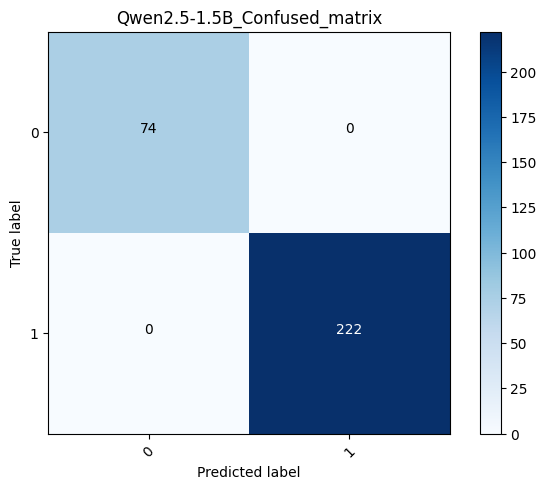

In [22]:
title = [0,1]

cm = confusion_matrix(y_true=df.actual_title, y_pred=df.pred_title)
plot_confusion_matrix(cm,
                      classes=title,
                      percentify_numbers = False,
                      title="Qwen2.5-1.5B_Confused_matrix")

In [23]:
accuracy = (df['actual_title'] == df['pred_title']).mean()

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 100.00%


# **Date**

In [24]:
actuals_date = []
pred_date = []

for item in test_dict:
  try :
    actuals_date.append(item['arguments']['date'])
  except:
    actuals_date.append(None)

for item in predict_dict:
  try :
    pred_date.append(item['arguments']['date'])
  except:
    pred_date.append(None)

actuals_date = np.array(actuals_date)
pred_date = np.array(pred_date)

df = pd.DataFrame({'input': input, 'actual_date': actuals_date, 'pred_date': pred_date})
df

,input,actual_date,pred_date
0,เพิ่มแจ้งเตือนนัดถกกันเรื่องโปรเจควันที่ 5 เมษ...,2026-04-05,2026-03-05
1,วันที่ 9 มิถุนายน ตอนสี่ทุ่ม มีนัดเทรนงาน ช่วย...,2025-06-09,2025-06-09
2,ขอดูตารางวันที่ 24 ตุลาคม หน่อย,2025-10-24,2025-10-24
3,ลบนัดเล่นเกมกับเพื่อนวันที่ 11 ธันวา ออก,2025-12-11,2025-12-11
4,มีนัดอะไรวันที่ 4 กันยายน บ้าง,2025-09-04,2025-09-04
...,...,...,...
291,วันพฤหัสหน้าตอนตีสามสามสิบ มีนัดคุยไอเดีย ช่วย...,2025-06-12,2025-06-11
292,วันที่ 23 พฤษภา ตอนตีห้า ผมมีนัดปรึกษาโปรเจกต์...,2026-05-23,2026-05-23
293,เปลี่ยนเวลานัดออกกำลังกายของวันที่ 4 ธันวา ไปเ...,2025-12-04,2025-12-04
294,เปลี่ยนเวลานัดตรวจงาน วันที่ 29 ธันวา เป็นเก้า...,2025-12-29,2025-12-29


In [25]:
accuracy = (df['actual_date'] == df['pred_date']).mean()

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 57.77%


# **Time**

In [26]:
actuals_time = []
pred_time = []

for item in test_dict:
  try :
    actuals_time.append(item['arguments']['time'])
  except:
    actuals_time.append(None)

for item in predict_dict:
  try :
    pred_time.append(item['arguments']['time'])
  except:
    pred_time.append(None)

actuals_time = np.array(actuals_time)
pred_time = np.array(pred_time)

df = pd.DataFrame({'input': input, 'actual_time': actuals_time, 'pred_time': pred_time})
df

,input,actual_time,pred_time
0,เพิ่มแจ้งเตือนนัดถกกันเรื่องโปรเจควันที่ 5 เมษ...,13:15,13:15
1,วันที่ 9 มิถุนายน ตอนสี่ทุ่ม มีนัดเทรนงาน ช่วย...,22:00,22:00
2,ขอดูตารางวันที่ 24 ตุลาคม หน่อย,None,None
3,ลบนัดเล่นเกมกับเพื่อนวันที่ 11 ธันวา ออก,None,None
4,มีนัดอะไรวันที่ 4 กันยายน บ้าง,None,None
...,...,...,...
291,วันพฤหัสหน้าตอนตีสามสามสิบ มีนัดคุยไอเดีย ช่วย...,03:30,03:30
292,วันที่ 23 พฤษภา ตอนตีห้า ผมมีนัดปรึกษาโปรเจกต์...,05:00,05:00
293,เปลี่ยนเวลานัดออกกำลังกายของวันที่ 4 ธันวา ไปเ...,01:30,01:30
294,เปลี่ยนเวลานัดตรวจงาน วันที่ 29 ธันวา เป็นเก้า...,09:30,09:30


In [27]:
accuracy = ((df['actual_time'] == df['pred_time']) | (df['actual_time'].isna() & df['pred_time'].isna())).mean()

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 100.00%


In [28]:
df = pd.DataFrame({'input': input, 'actual_action': actuals, 'pred_action': predict, 'actual_date': actuals_date, 'pred_date': pred_date, 'actual_time': actuals_time, 'pred_time': pred_time})
df

,input,actual_action,pred_action,actual_date,pred_date,actual_time,pred_time
0,เพิ่มแจ้งเตือนนัดถกกันเรื่องโปรเจควันที่ 5 เมษ...,add_event_date,add_event_date,2026-04-05,2026-03-05,13:15,13:15
1,วันที่ 9 มิถุนายน ตอนสี่ทุ่ม มีนัดเทรนงาน ช่วย...,add_event_date,add_event_date,2025-06-09,2025-06-09,22:00,22:00
2,ขอดูตารางวันที่ 24 ตุลาคม หน่อย,view_event_date,view_event_date,2025-10-24,2025-10-24,None,None
3,ลบนัดเล่นเกมกับเพื่อนวันที่ 11 ธันวา ออก,delete_event_date,delete_event_date,2025-12-11,2025-12-11,None,None
4,มีนัดอะไรวันที่ 4 กันยายน บ้าง,view_event_date,view_event_date,2025-09-04,2025-09-04,None,None
...,...,...,...,...,...,...,...
291,วันพฤหัสหน้าตอนตีสามสามสิบ มีนัดคุยไอเดีย ช่วย...,add_event_date,add_event_date,2025-06-12,2025-06-11,03:30,03:30
292,วันที่ 23 พฤษภา ตอนตีห้า ผมมีนัดปรึกษาโปรเจกต์...,add_event_date,add_event_date,2026-05-23,2026-05-23,05:00,05:00
293,เปลี่ยนเวลานัดออกกำลังกายของวันที่ 4 ธันวา ไปเ...,update_event,update_event,2025-12-04,2025-12-04,01:30,01:30
294,เปลี่ยนเวลานัดตรวจงาน วันที่ 29 ธันวา เป็นเก้า...,update_event,update_event,2025-12-29,2025-12-29,09:30,09:30


In [29]:
total_acc = (
    (df['actual_action'] == df['pred_action']) &
    (df['actual_date'] == df['pred_date']) &
    ((df['actual_time'] == df['pred_time']) | (df['actual_time'].isna() & df['pred_time'].isna()))
).mean()


print(f'Total Accuracy (all fields match): {total_acc:.2%}')

Total Accuracy (all fields match): 57.77%


# **All**

In [30]:
# Accuracy ของ action
action_acc = (df['actual_action'] == df['pred_action']).mean()

# Accuracy ของ date
date_acc = (df['actual_date'] == df['pred_date']).mean()

# Accuracy ของ time
time_acc = ((df['actual_time'] == df['pred_time']) | (df['actual_time'].isna() & df['pred_time'].isna())).mean()

# Accuracy ทั้งหมด
total_acc = (
    (df['actual_action'] == df['pred_action']) &
    (df['actual_date'] == df['pred_date']) &
    ((df['actual_time'] == df['pred_time']) | (df['actual_time'].isna() & df['pred_time'].isna()))
).mean()


print(f'Action Accuracy: {action_acc:.2%}')
print(f'Date Accuracy: {date_acc:.2%}')
print(f'Time Accuracy: {time_acc:.2%}')
print()

print(f'Total Accuracy (all fields match): {total_acc:.2%}')

Action Accuracy: 100.00%
Date Accuracy: 57.77%
Time Accuracy: 100.00%

Total Accuracy (all fields match): 57.77%
